# Lab 8: Springs II

$\textbf{Objective}$

The objective of this experiment is to analyze the motion of a spring and find the spring constant, $k$, using simple harmonic motion and Hooke's Law. These parameters are then used to determine the mass of an unknown object.

$\textbf{Theory}$

Similar to the previous experiment, this lab utilizes Hooke's Law and simple harmonic motion. However, unlike the rubber band in the previous lab, this experiment uses a real spring which is expected to follow Hooke's Law more linearly. Additionally, the effective mass of the spring itself is accounted for in the dynamic analysis.

**1. Hooke's Law**
The force required to extend a spring is proportional to the extension:
$$
F = k\Delta x
$$
where:
$F$ is the applied force (gravity, $mg$)
$k$ is the spring constant
$\Delta x$ is the extension from the reference position ($x - x_0$)

Here, $k$ corresponds to the slope of the Force vs. Extension graph.

**2. Simple Harmonic Motion (SHM)**
For a vertical mass-spring system, the period of oscillation depends on the total mass. To improve accuracy, we include the effective mass of the spring ($m_s/3$) in the equation:
$$
\omega = \sqrt{\frac{k}{m + \frac{m_s}{3}}}
$$

Using the relationship $\omega = \frac{2\pi}{T}$, this equation can be linearized to find the relationship between period squared and mass:

$$
\frac{T^2}{4\pi^2} = \frac{1}{k}m + \frac{m_s}{3k}
$$

**3. Finding the Unknown Mass**
Once $k$ is determined, the mass of an unknown object can be calculated by measuring its oscillation period ($T$) and rearranging the SHM equation:

$$
m_{unknown} = k\left(\frac{T^2}{4\pi^2}\right) - \frac{m_s}{3} - m_{hanger}
$$

$\textbf{Experiment Method/Procedure}$

To find the spring constant using Hooke's Law:

A spring was hung from a clamp stand with a mass hanger attached. The equilibrium position $x_0$ was recorded.
Different masses were added, ranging from approximately 0.28 kg to 1.65 kg. The new length $x$ was measured for each mass to compute the extension $\Delta x$. The force was calculated as $F=mg$.

The file `lab08.csv` contains the data obtained from Logger Pro which was used to perform analysis using Python. 

The data was analyzed in Python. A scatter plot of Force v/s $\Delta x$ was generated, where the slope of the graph corresponds to the spring constant, $k$.

The image `lab08.jpeg` represents the linearized graph of Force v/s $\Delta x$ with the slope being equal to the spring constant $k$.

To find the unknown mass using SHM:

The unknown mass was attached to the spring, and the system was set into oscillation. A video of the motion was recorded and analyzed using Tracker software to determine the period $T$.
Using the spring constant $k$ found from Hooke's Law and the measured period $T$, the mass of the unknown object was calculated using the SHM equation.

$\textbf{Results}$

From the analysis in Python, the spring constant determined from the slope of the Force vs. Extension graph (Figure 8.2) was:
$$
k = 44.397 \, N/m
$$

Using this spring constant and the measured period of oscillation ($T = 0.767$ s), the mass of the unknown object was calculated to be:
$$
m_{unknown} = 0.535 \, kg
$$

$\textbf{Discussion}$

The spring constant obtained from Hooke's Law was used to successfully determine the unknown mass. The SHM method was the only method suitable for finding the unknown mass in this experiment because the static extension ($\Delta x$) for the unknown mass was not recorded.

Compared to the previous experiment (Springs I), this experiment produced more consistent results. This is likely because a proper spring was used instead of a rubber band, and video analysis provided a cleaner measurement of the period compared to manual timing.

$\textbf{Conclusion}$

The spring constant was determined to be $k = 44.397$ N/m. Using this value and simple harmonic motion theory, the mass of the unknown object was found to be $0.535$ kg.

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

44.397216552526885
The slope is 44.397216552526885 [1/nm] +/- 1.8976224612911574 [1/nm] and the intercept is 1.4409296469155186[1/nm] +- 0.34879622335123533 [1/nm]


/tmp/ipykernel_803/1374088027.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = legend_title,loc='best',prop={'size':20})


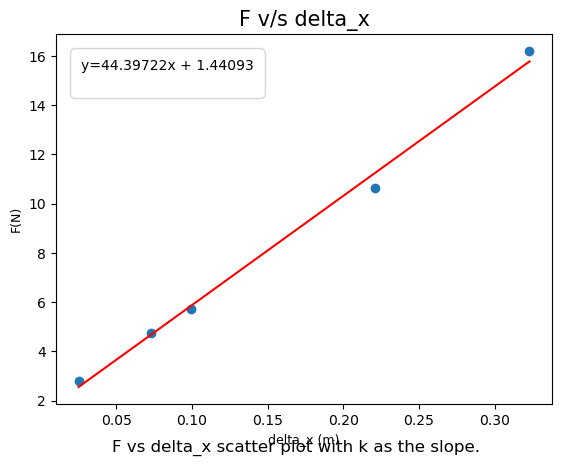

In [3]:
csv_data = pd.read_csv("lab8.csv")
F = csv_data["F"] 
delta_x = csv_data["delta x"]
F = np.array(F)
delta_x = np.array(delta_x)

plt.scatter(delta_x,F)
plt.title("F v/s delta_x",fontsize=15)
plt.xlabel("delta_x (m)",fontsize=9)
plt.ylabel("F(N)",fontsize=9)

coeffs, uncertainty = np.polyfit(delta_x, F, 1, cov=True)
slope = coeffs[0]
print(slope)
intercept = coeffs[1]
linear_fit = slope * delta_x + intercept
slope_uncer = np.sqrt(uncertainty[0,0])
intercept_uncer = np.sqrt(uncertainty[1,1])
print(f"The slope is {coeffs[0]} [1/nm] +/- {slope_uncer} [1/nm] and the intercept is {coeffs[1]}[1/nm] +- {intercept_uncer} [1/nm]")
legend_title = f"y={slope:.5f}x + {intercept:.5f}"
plt.legend(title = legend_title,loc='best',prop={'size':20})
plt.plot(delta_x,linear_fit,color = 'red')

caption = "F vs delta_x scatter plot with k as the slope."
plt.figtext(0.5, 0.01, caption, wrap=True, horizontalalignment='center', fontsize=12)
plt.savefig('lab08.jpeg')
plt.show()

In [25]:
T = [1.233,1.033,1.033,1,0.867,0.767]
k = 40.043
m_used = [0.5,0.20032,1,0.4007,0.5985]
ms = 0.08375
m = []
m_final = []
for t in T:
    m1 = (k*(3*t*t)/(4*np.pi*np.pi) - ms)/3
    m.append(m1)

for i,j in zip(m,m_used):
    m1 = i-j
    m_final.append(m1)

print(np.average(m_final))

0.5288732630520672
